Analysis
Observable trend1:
    From City Latitude vs. Max Temperature(12/2017), we can tell that the cities which are closed to equator have
    higher temperature.  
    
Observable trend2:
    From City Latitude vs. Humidity(12/2017), we can tell that equator has nothing to do with a city's humidity.
    From City Latitude vs. Cloudiness (12/2017), we can tell that equator has nothing to do with a city's Cloudiness.
Observable trend3:
    From City Latitude vs. Wind Speed (12/2017), we can tell that equator has nothing to do with a city's Wind Speed.
    

In [58]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [90]:
import json
import requests as req
import random
from citipy import citipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
api_key = 'f3931189c225f49685f8c7d815baa5a5'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "Imperial" 

In [71]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=f3931189c225f49685f8c7d815baa5a5&units=Imperial&q='

In [72]:
lats = []
for x in range(1500):
    lats.append(random.uniform(-180,180))

lons = []
for x in range(1500):
    lons.append(random.uniform(-90,90))
    
cities = []
for x in range(1500):
    city = citipy.nearest_city(lons[x], lats[x]).city_name
    cities.append(city)
#city.country_code
#cities

In [73]:
weather_data = []

for city in cities:
    weather_data.append(req.get(query_url + city).json())

#weather_data

In [74]:
allcity = [data.get('name') for data in weather_data]
cloudiness = [data.get('clouds') for data in weather_data]
country = [data.get('sys') for data in weather_data]
date = [data.get('dt') for data in weather_data]
humidity = [data.get('main') for data in weather_data]
coord = [data.get('coord') for data in weather_data]
max_temp = [data.get('main') for data in weather_data]
wind_speed = [data.get("wind") for data in weather_data]

In [136]:
weather_data1 = {"City": allcity,
                "Cloudiness": cloudiness, 
                "Country": country, 
                "Date": date, 
                "Humidity": humidity, 
                "Coord": coord, 
                "Max Temp": max_temp, 
                "Wind Speed": wind_speed}
weather_data1 = pd.DataFrame(weather_data1)
weather_data1.dropna().head()

,City,Cloudiness,Coord,Country,Date,Humidity,Max Temp,Wind Speed
1,Ponta do Sol,{'all': 0},"{'lon': -46, 'lat': -20.63}","{'message': 0.0039, 'country': 'BR', 'sunrise'...",1.514297e+09,"{'temp': 84.69, 'pressure': 924.86, 'humidity'...","{'temp': 84.69, 'pressure': 924.86, 'humidity'...","{'speed': 6.4, 'deg': 37.501}"
2,Bluff,{'all': 80},"{'lon': 149.07, 'lat': -23.58}","{'message': 0.0039, 'country': 'AU', 'sunrise'...",1.514297e+09,"{'temp': 77.44, 'pressure': 1002.19, 'humidity...","{'temp': 77.44, 'pressure': 1002.19, 'humidity...","{'speed': 11.65, 'deg': 43.501}"
3,Vaini,{'all': 0},"{'lon': 74.49, 'lat': 15.34}","{'message': 0.0042, 'country': 'IN', 'sunrise'...",1.514297e+09,"{'temp': 74.38, 'pressure': 961.66, 'humidity'...","{'temp': 74.38, 'pressure': 961.66, 'humidity'...","{'speed': 6.06, 'deg': 76.501}"
4,Severo-Kurilsk,{'all': 48},"{'lon': 156.12, 'lat': 50.68}","{'message': 0.003, 'country': 'RU', 'sunrise':...",1.514297e+09,"{'temp': 29.56, 'pressure': 990.28, 'humidity'...","{'temp': 29.56, 'pressure': 990.28, 'humidity'...","{'speed': 16.58, 'deg': 193.001}"
5,Severo-Kurilsk,{'all': 48},"{'lon': 156.12, 'lat': 50.68}","{'message': 0.003, 'country': 'RU', 'sunrise':...",1.514297e+09,"{'temp': 29.56, 'pressure': 990.28, 'humidity'...","{'temp': 29.56, 'pressure': 990.28, 'humidity'...","{'speed': 16.58, 'deg': 193.001}"


In [76]:
allcity2 = weather_data1.dropna()['City'].tolist()
cloudiness2 = [data.get('all') for data in weather_data1.dropna()['Cloudiness'].tolist()]
country2 = [data.get('country') for data in weather_data1.dropna()['Country'].tolist()]
date2 = weather_data1.dropna()['Date'].tolist()
humidity2 = [data.get('humidity') for data in weather_data1.dropna()['Humidity'].tolist()]
lon2 = [data.get('lon') for data in weather_data1.dropna()['Coord'].tolist()]
lat2 = [data.get('lat') for data in weather_data1.dropna()['Coord'].tolist()]
max_temp2 = [data.get('temp_max') for data in weather_data1.dropna()['Max Temp'].tolist()]
wind_speed2 = [data.get("speed") for data in weather_data1.dropna()['Wind Speed'].tolist()]

In [126]:
weather_data2 = {"City": allcity2,
                "Cloudiness": cloudiness2, 
                "Country": country2, 
                "Date": list(map(int, date2)), 
                "Humidity": humidity2, 
                "Lat": lat2,
                "Lng": lon2, 
                "Max Temp": max_temp2, 
                "Wind Speed": wind_speed2}
weather_data2 = pd.DataFrame(weather_data2)
weatherpy = weather_data2.drop_duplicates(['City'], keep = 'last')
weatherpy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,Kandrian,36,PG,1514296982,100,-6.21,149.55,74.97,2.93
7,Rawlins,90,US,1514294100,79,41.79,-107.24,24.80,14.99
13,Kuyanovo,88,RU,1514296986,88,56.95,86.47,20.65,18.59
14,Beringovskiy,24,RU,1514296987,100,63.05,179.32,-3.20,8.41
15,Oleksandrivka,20,UA,1514296988,95,48.74,37.49,39.19,9.86


In [137]:
weatherpy.to_csv('WeatherPy.csv', sep='\t')

In [127]:
# Temperature (F) vs. Latitude

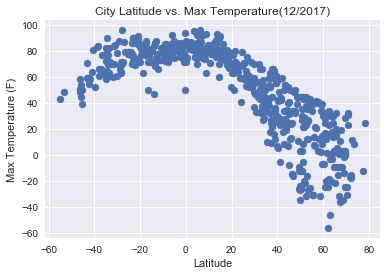

In [138]:
plt.scatter(weatherpy["Lat"], weatherpy["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature(12/2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsMaxTemperature122017.png")

# Show plot
sns.set()
plt.show()

In [139]:
# Humidity (%) vs. Latitude

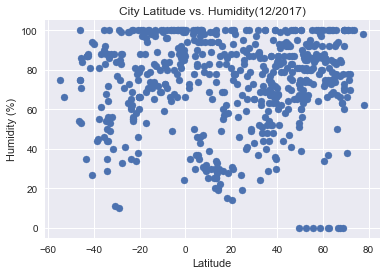

In [140]:
plt.scatter(weatherpy["Lat"], weatherpy["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity(12/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidity122017.png")

# Show plot
sns.set()
plt.show()

In [141]:
# Cloudiness (%) vs. Latitude

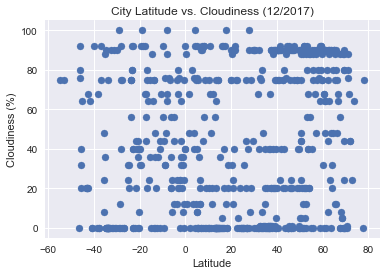

In [142]:
plt.scatter(weatherpy["Lat"], weatherpy["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (12/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsCloudiness122017.png")

# Show plot
sns.set()
plt.show()

In [143]:
# Wind Speed (mph) vs. Latitude

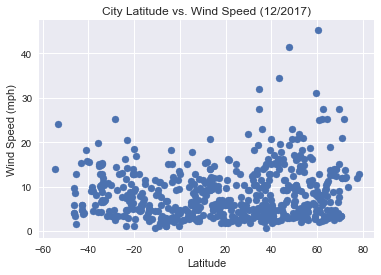

In [144]:
plt.scatter(weatherpy["Lat"], weatherpy["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed (12/2017)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsWindSpeed122017.png")

# Show plot
sns.set()
plt.show()